## Problem 1.商店客流量数据可视化
## 1.0 文件读取

In [17]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#使绘图内嵌到 notebook 中
%matplotlib inline

In [18]:
shop = pd.read_csv('dataset/shop_payNum_new.csv', index_col=0, parse_dates=True)
shop.head()

,shop_id,pay_num,cate_2_name
time_stamp,,,
2016-01-01,14,33,fast food
2016-01-02,14,35,fast food
2016-01-03,14,20,fast food
2016-01-04,14,53,fast food
2016-01-05,14,54,fast food


## 1.1 绘制所有便利店的10月的客流量折线图。

C:\anaconda3\envs\datamining\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


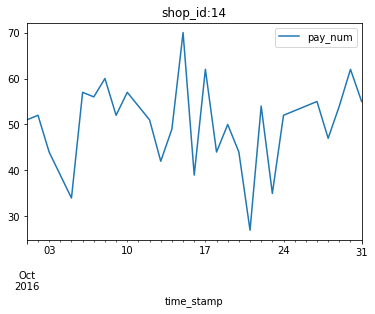

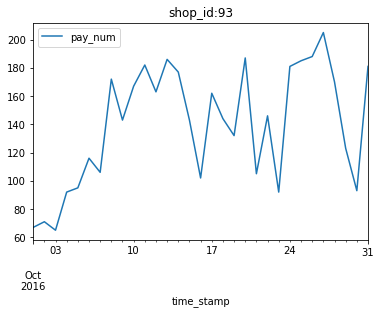

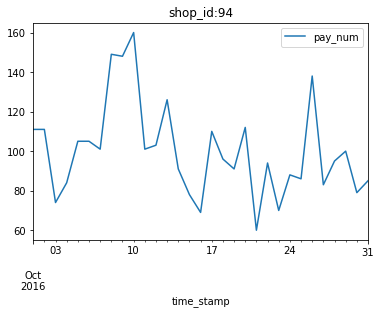

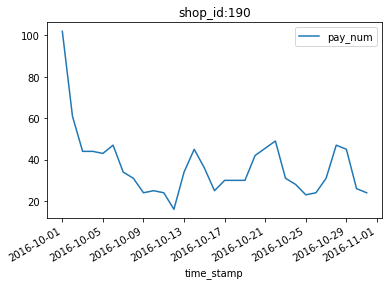

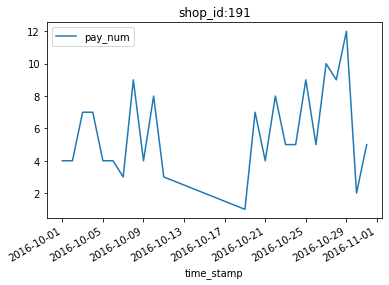

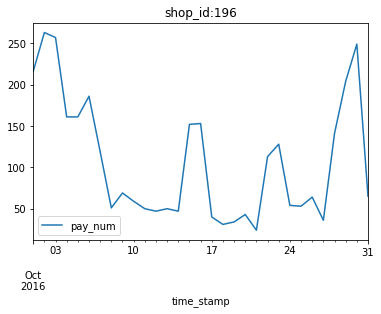

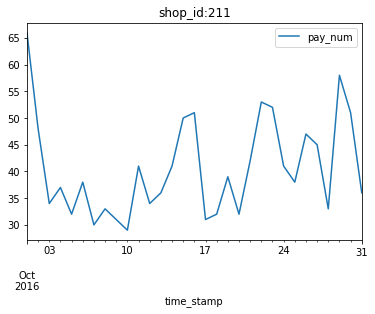

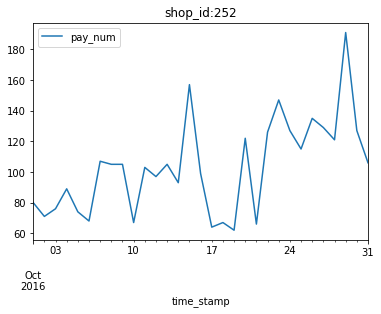

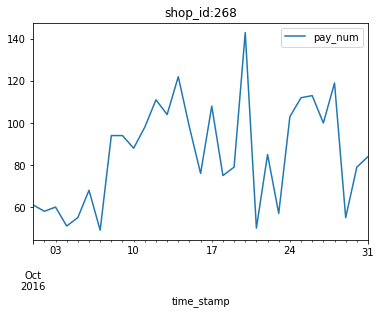

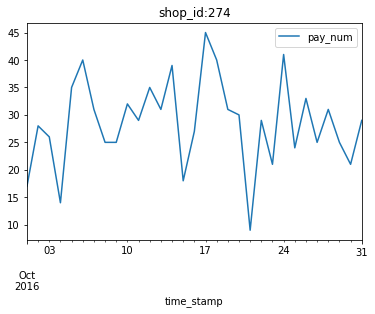

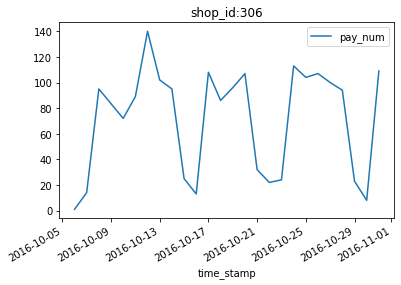

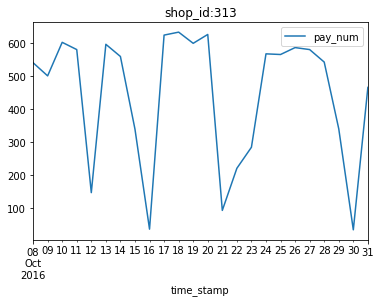

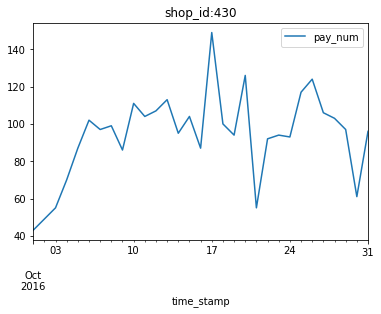

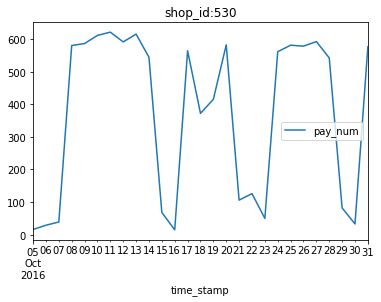

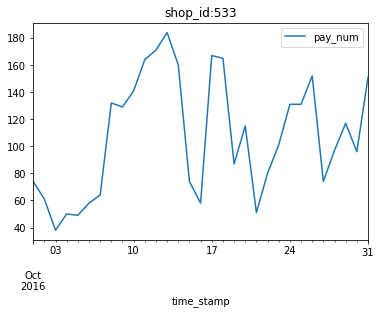

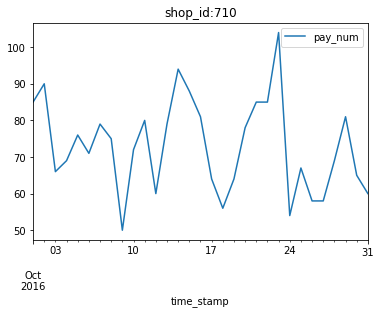

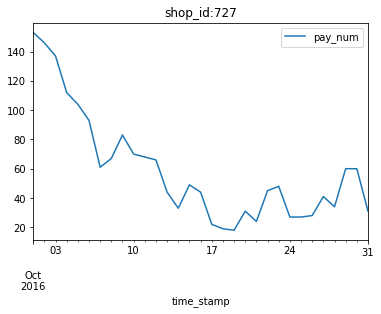

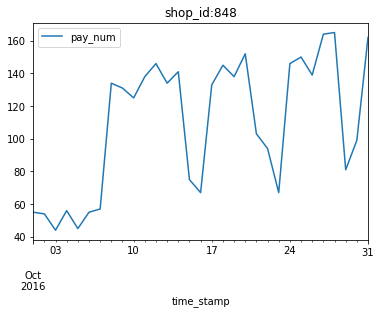

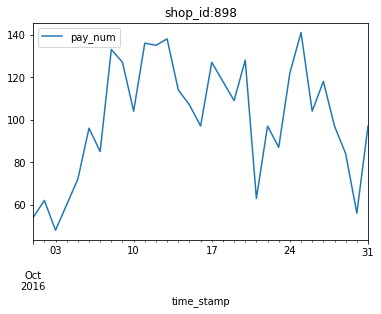

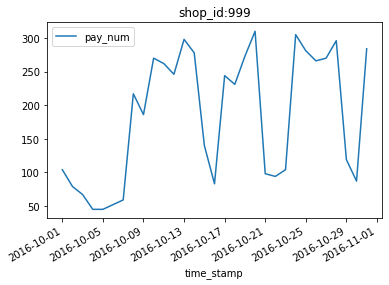

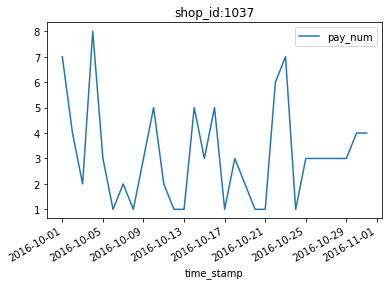

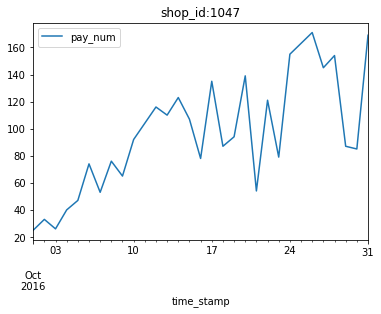

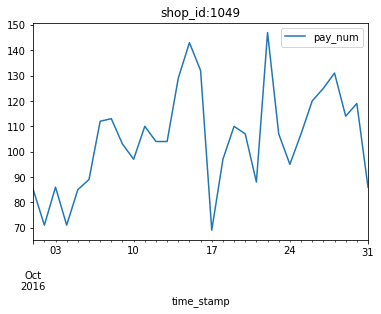

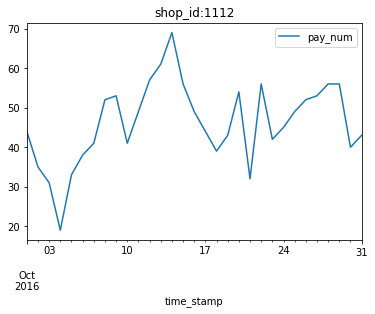

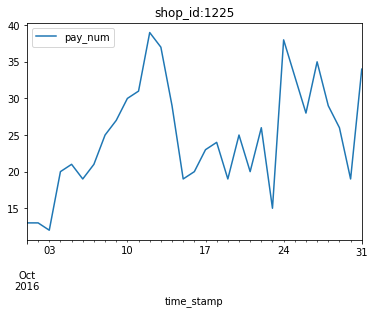

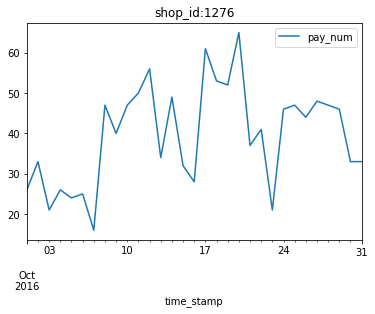

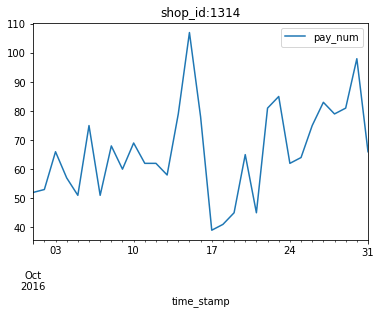

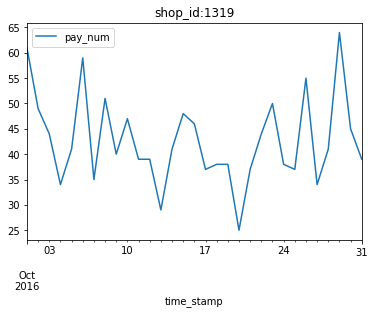

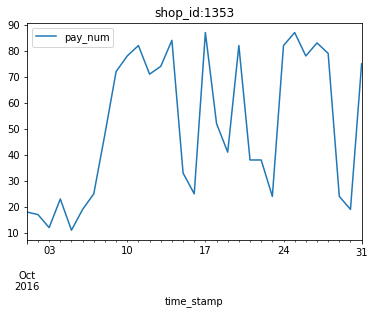

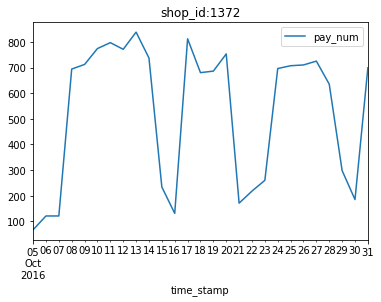

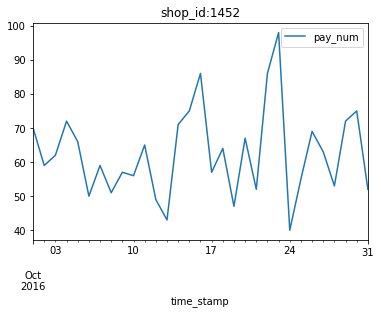

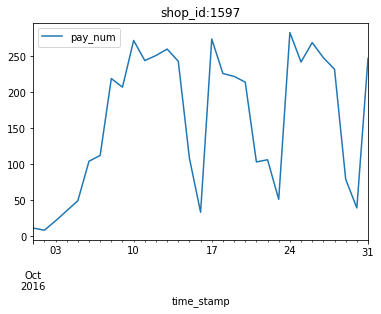

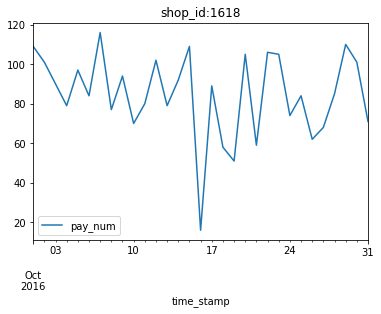

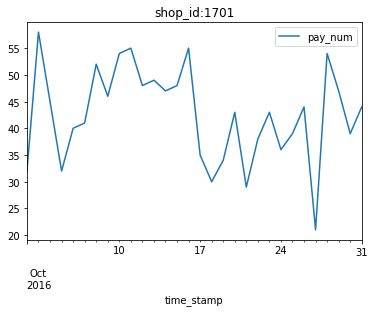

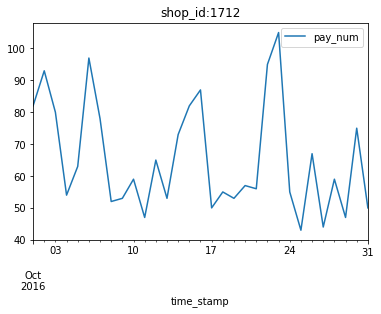

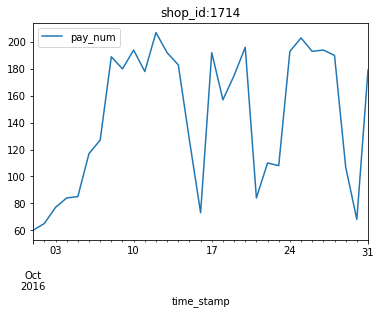

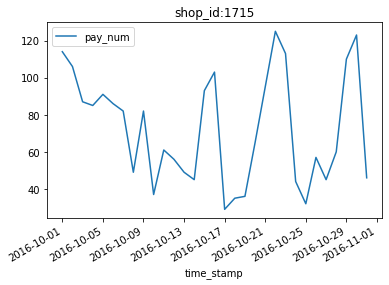

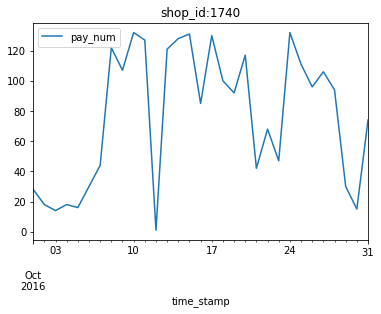

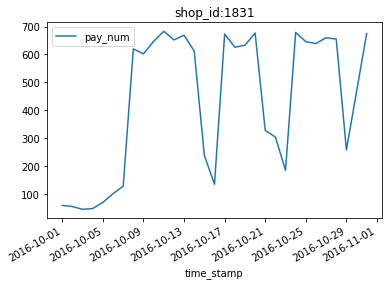

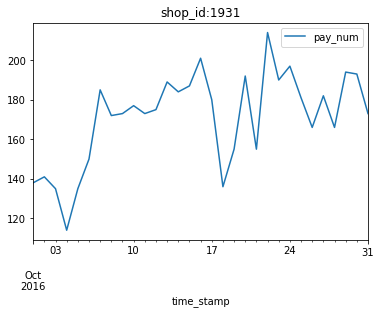

In [19]:
Octobor_shop = shop.iloc[shop.index.month == 10, :2]
df = pd.DataFrame(Octobor_shop).groupby('shop_id')

for name, group in df:
    group.plot(y=['pay_num'], kind='line', title='shop_id:' + str(name))

## 1.2 绘制每类商家10月份的日平均客流量折线图。

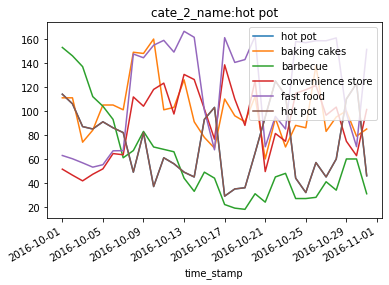

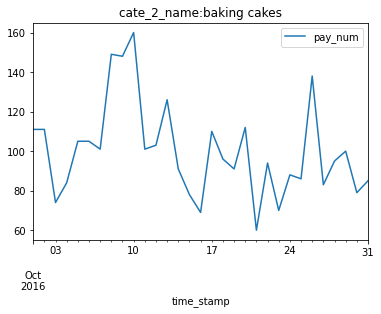

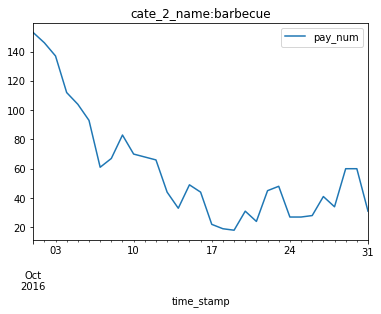

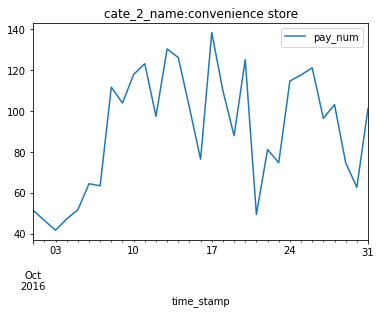

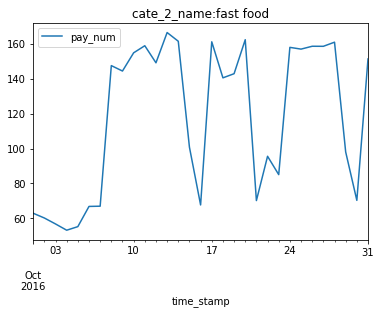

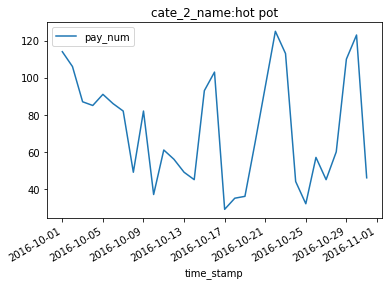

In [21]:
Octobor_mean_shop = shop.iloc[shop.index.month == 10].drop(columns=['shop_id'])
df = Octobor_mean_shop.groupby(['cate_2_name'])
ax=group.plot()
for name, group in df:
    group = group.groupby('time_stamp').mean()
    group.plot(y=['pay_num'], kind='line', title='cate_2_name:' + name,ax=None)
    group.columns=[name]
    group.plot(ax=ax, y=[name], kind='line', title='cate_2_name:' + name)

## 1.5 选择一个商家，绘制客流量直方图。

            shop_id  pay_num cate_2_name
time_stamp                              
2016-01-01       14       33   fast food
2016-01-02       14       35   fast food
2016-01-03       14       20   fast food
2016-01-04       14       53   fast food
2016-01-05       14       54   fast food
...             ...      ...         ...
2016-10-27       14       55   fast food
2016-10-28       14       47   fast food
2016-10-29       14       54   fast food
2016-10-30       14       62   fast food
2016-10-31       14       55   fast food

[305 rows x 3 columns]


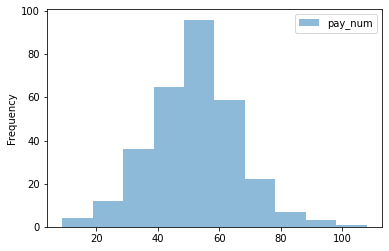

In [22]:
shop_id = 14
people_hist = shop[shop['shop_id'] == shop_id]
people_hist.plot(y='pay_num', kind='hist', alpha=0.5)
print(people_hist)

## 1.6 选择一个商家，绘制客流量密度图。

            shop_id  pay_num cate_2_name
time_stamp                              
2016-01-01       14       33   fast food
2016-01-02       14       35   fast food
2016-01-03       14       20   fast food
2016-01-04       14       53   fast food
2016-01-05       14       54   fast food
...             ...      ...         ...
2016-10-27       14       55   fast food
2016-10-28       14       47   fast food
2016-10-29       14       54   fast food
2016-10-30       14       62   fast food
2016-10-31       14       55   fast food

[305 rows x 3 columns]


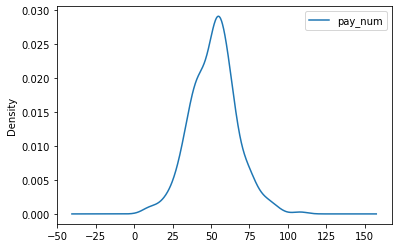

In [23]:
shop_id = 14
people_hist = shop[shop['shop_id'] == shop_id]
people_hist.plot(y='pay_num', kind='kde')
print(people_hist)

## 1.7 统计某个月各个类别商店总客流量占该月总客流量的比例，绘制饼图。

<AxesSubplot:title={'center':'month =1'}, ylabel='pay_num'>

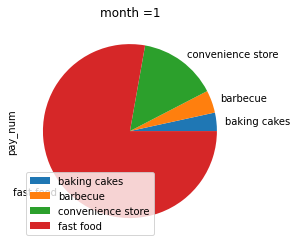

In [24]:
month = 1
month_pie = shop.iloc[shop.index.month == month].drop(columns=['shop_id'])
month_sum = month_pie.groupby('cate_2_name').sum()
month_rate = month_sum / month_sum.sum()
month_rate.plot(kind='pie', y='pay_num', title='month =' + str(month))